# Loan

## 0 Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Load and first look

### 1.1 Dataset Description

The dataset **Loan** can be used to predict the class of a loan grade. The dataset is given as a csv file and will be imported via pandas.

It includes
- **loan-10k.lrn.csv**: training dataset
- **loan-10k.tes.csv**: test/validation dataset
- **loan-10k.sol.ex.csv**: sample solutions

In [4]:
datafolder = "../../datasets/Loan"

training_file = f"{datafolder}/loan-10k.lrn.csv"
test_file = f"{datafolder}/loan-10k.tes.csv"
solution_file = f"{datafolder}/loan-10k.sol.ex.csv"

training_df = pd.read_csv(training_file)
test_df = pd.read_csv(test_file)

print(f"""
Dataset name: Loan
Abstract: 
Task: Multiclass classification
The training dataset has following properties:
    - Number of Instances: {training_df.shape[0]}
    - Number of Features: {training_df.shape[1]-1}
    - Number of Target Attributes: 1
    - Number of Dimensions: {training_df.ndim}
    - Has missing values: {'yes' if training_df.isnull().sum().sum() > 0 else 'no'}
    - Types of attributes: {training_df.dtypes.value_counts().to_dict()}
    - Duplicate Instances: {training_df.duplicated().sum()}
The validation dataset has following properties:
    - Number of Instances: {test_df.shape[0]}
    - Has missing values: {'yes' if test_df.isnull().sum().sum() > 0 else 'no'}
    - Duplicate Instances: {test_df.duplicated().sum()}
""")


Dataset name: Loan
Abstract: 
Task: Multiclass classification
The training dataset has following properties:
    - Number of Instances: 10000
    - Number of Features: 91
    - Number of Target Attributes: 1
    - Number of Dimensions: 2
    - Has missing values: no
    - Types of attributes: {dtype('float64'): 69, dtype('O'): 14, dtype('int64'): 9}
    - Duplicate Instances: 0
The validation dataset has following properties:
    - Number of Instances: 10000
    - Has missing values: no
    - Duplicate Instances: 0



In [5]:
training_df.head()

,ID,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
0,24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,...,N,6,2018,6,2000,2,2019,2,2019,A
1,67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,...,N,10,2015,9,1984,2,2019,2,2019,E
2,35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,...,N,9,2017,10,2006,1,2018,11,2018,D
3,4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,...,N,0,2015,6,1996,6,2016,9,2017,C
4,59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,...,N,11,2016,0,2002,2,2019,2,2019,C


### 1.2 Attributes

In [6]:
print(f"{'Attribute':<25} {'Data Type':<10} {'Missing Values':<15} {'Min':<10} {'Max'}")
print("-" * 70)
for col in training_df.columns:
    if training_df[col].dtype in [np.int64, np.float64]:
        print(f"{col:<25} {str(training_df[col].dtype):<10} {training_df[col].isnull().sum():<15} {training_df[col].min():<10} {training_df[col].max()}")
    else:
        print(f"{col:<25} {str(training_df[col].dtype):<10} {training_df[col].isnull().sum():<15} {'n.a.':<10} {'n.a.':<10} {set(training_df[col].values)}") 

Attribute                 Data Type  Missing Values  Min        Max
----------------------------------------------------------------------
ID                        int64      0               0          99999
loan_amnt                 float64    0               1000.0     40000.0
funded_amnt               float64    0               1000.0     40000.0
funded_amnt_inv           float64    0               1000.0     40000.0
term                      object     0               n.a.       n.a.       {' 60 months', ' 36 months'}
int_rate                  float64    0               5.31       30.99
installment               float64    0               30.12      1717.63
emp_length                object     0               n.a.       n.a.       {'5 years', '2 years', '8 years', '9 years', '10+ years', '1 year', '4 years', '3 years', '< 1 year', '6 years', '7 years'}
home_ownership            object     0               n.a.       n.a.       {'RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY'}
annual_inc 

#### 1.2.1 Description & Data Types

- `ID` (_Integer_): Each record has a unique identifier, which is not a predictive feature but used for reference.
- `grade` (_Object_): **Target attribute** indicating the loan score. Training dataset contains values between A and G.

**Numerical attributes** (selection)
- `loan_amount`, `funded_amnt`, `funded_amnt_inv`
- `int_rate`
- `installment`
- `annual_inc`
- `dti`
- `delinq_2yrs`
- `fico_range_low`, `fico_range_high`, `last_fico_range_high`, `last_fico_range_low`
- `inq_las_6mths`
- `open_acc`
- `pub_rec`
- `revol_bal`, `revol_util`
- `total_acc`
- `out_prncp`, `out_prncp_inv`
- `total_pymnt`, `total_pymnt_inv`, `last_pymnt_amnt`
- `total_rec_prncp`, `total_rec_int`, `total_rec_late_fee`
- `recoveries`
- `collection_recovery_fee`

**Categorical attributes**: 
- `term`
- `emp_length`
- `home_ownership`
- `verification_status`
- `loan_status`
- `pymnt_plan`
- `purpose`
- `addr_state`
- `initial_list_status`
- `hardship_flag`
- `disbursement_method`
- `debt_settlement_flag`

Some features are stored as objects (categorical) altough they are binary, those will be transformed to a binary column. Some features are stored as objects, although they can be translated to a numerical feature, those will be transformed to nurmical features. This will be handeld in the data cleaning section.


In [7]:
len(training_df.columns)

92

## 2 Data Cleaning

### 2.1 Datatypes

In [8]:
originally_numerical_features = training_df.select_dtypes(include=[np.number]).columns.tolist()
originally_categorical_features = training_df.select_dtypes(include=['object']).columns.tolist()
originally_categorical_features.remove('grade')  # Remove target variable from features list
categorical_mappings = {}
for col in originally_categorical_features:
    categorical_mappings[col] = training_df[col].unique().tolist()

In [9]:
# Columsn that are actually binary but stored as objects (categorical)
new_binary_features = {
    # "old variable name":
    # {
    #     "name of positive": "new value representing positive class",
    #     "name of negative": "new value representing negative class"
    # }
    "pymnt_plan":
        {
            'n': False,
            'y': True
        },
    "initial_list_status":
        {
            'f': False,
            'w': True
        },
    "hardship_flag":
        {
            'N': False,
            'Y': True
        },
    "debt_settlement_flag":
        {
            'N': False,
            'Y': True
        }
}
new_numerical_features = {
    "term": {
        ' 36 months': 36,
        ' 60 months': 60
    },
}

emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

verification_status_mapping = {
    'Not Verified': 0,
    'Source Verified': 1,
    'Verified': 2
}


In [10]:
len(training_df.columns)

92

In [11]:
#remap categorical to binary and add "_bin" suffix
for col, mapping in new_binary_features.items():
    training_df[col + "_bin"] = training_df[col].map(mapping)
    training_df.drop(columns=[col], inplace=True)
    test_df[col + "_bin"] = test_df[col].map(mapping)
    test_df.drop(columns=[col], inplace=True)


In [12]:
#remap categorical to numerical
for col, mapping in new_numerical_features.items():
    training_df[col] = training_df[col].map(mapping)
    test_df[col] = test_df[col].map(mapping)

In [13]:
#remap categorical mappings
training_df['emp_length'] = training_df['emp_length'].map(emp_length_mapping)
test_df['emp_length'] = test_df['emp_length'].map(emp_length_mapping)

In [14]:
#remap verification_status
training_df['verification_status'] = training_df['verification_status'].map(verification_status_mapping)
test_df['verification_status'] = test_df['verification_status'].map(verification_status_mapping)

In [15]:
# Create combined date features
# For issue_d: time since the loan was issued (in months from a reference point)
training_df['issue_d_months_since_reference'] = (training_df['issue_d_year'] - 2012) * 12 + training_df['issue_d_month']
test_df['issue_d_months_since_reference'] = (test_df['issue_d_year'] - 2012) * 12 + test_df['issue_d_month']

# For earliest_cr_line: credit history age at time of loan
training_df['credit_history_age'] = (training_df['issue_d_year'] - training_df['earliest_cr_line_year']) * 12 + \
                                     (training_df['issue_d_month'] - training_df['earliest_cr_line_month'])
test_df['credit_history_age'] = (test_df['issue_d_year'] - test_df['earliest_cr_line_year']) * 12 + \
                                 (test_df['issue_d_month'] - test_df['earliest_cr_line_month'])

# Drop original date columns
training_df.drop(columns=['issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year'], inplace=True)
test_df.drop(columns=['issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year'], inplace=True)

### 2.2 Remove non informative variables
**policy_code** only has 1.0 as a single value. Remove this

In [16]:
training_df["policy_code"].value_counts()

policy_code
1.0    10000
Name: count, dtype: int64

In [17]:
training_df.drop(columns=["policy_code"], inplace=True)
test_df.drop(columns=["policy_code"], inplace=True)

### 2.3 Missing Values and Duplicates
As already mentioned, there ar luckily no missing variables and also no duplicates

In [18]:
print(f"""
Missing values in training set: {training_df.isnull().sum().sum()}
Missing values in test set: {test_df.isnull().sum().sum()}
Duplicate instances in training set: {training_df.duplicated().sum()}
Duplicate instances in test set: {test_df.duplicated().sum()}
""")


Missing values in training set: 0
Missing values in test set: 0
Duplicate instances in training set: 0
Duplicate instances in test set: 0



### 2.4 Summary

In [19]:
# (Initial summary — will be recomputed after cleanup too)
numerical_feature_names = training_df.select_dtypes(include=[np.number]).columns.tolist()
# include both Python bool and pandas nullable Boolean
binary_feature_names = training_df.select_dtypes(include=['bool', 'boolean']).columns.tolist()
categorical_feature_names = training_df.select_dtypes(include=['category', 'object']).columns.tolist()
if 'grade' in categorical_feature_names:
    categorical_feature_names.remove('grade')  # Remove target variable from features list

In [20]:
"emp_length" in numerical_feature_names 

True

In [21]:
print(f"""
After preprocessing, the training dataset has:
    - Rows: {training_df.shape[0]}
    - Features (excluding target): {training_df.shape[1]-1}
        - Numerical: {len(numerical_feature_names)}
        - Binary: {len(binary_feature_names)}
        - Categorical: {len(categorical_feature_names)}
Target classes: {sorted(training_df['grade'].unique())}
""")


After preprocessing, the training dataset has:
    - Rows: 10000
    - Features (excluding target): 88
        - Numerical: 78
        - Binary: 4
        - Categorical: 6
Target classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G']



## 3 Visualisations

### 3.1 Target Visualizations

/tmp/ipykernel_351441/2889015546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data=training_df, order=sorted(training_df['grade'].unique()), palette='Set2')


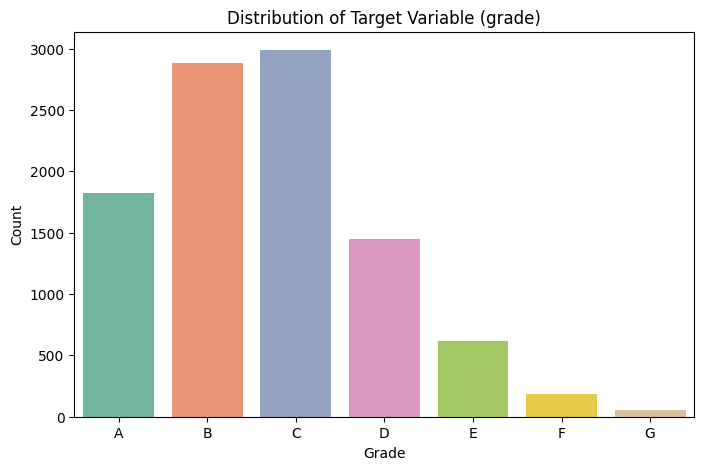

In [18]:
# Visualize target distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='grade', data=training_df, order=sorted(training_df['grade'].unique()), palette='Set2')
plt.title('Distribution of Target Variable (grade)')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

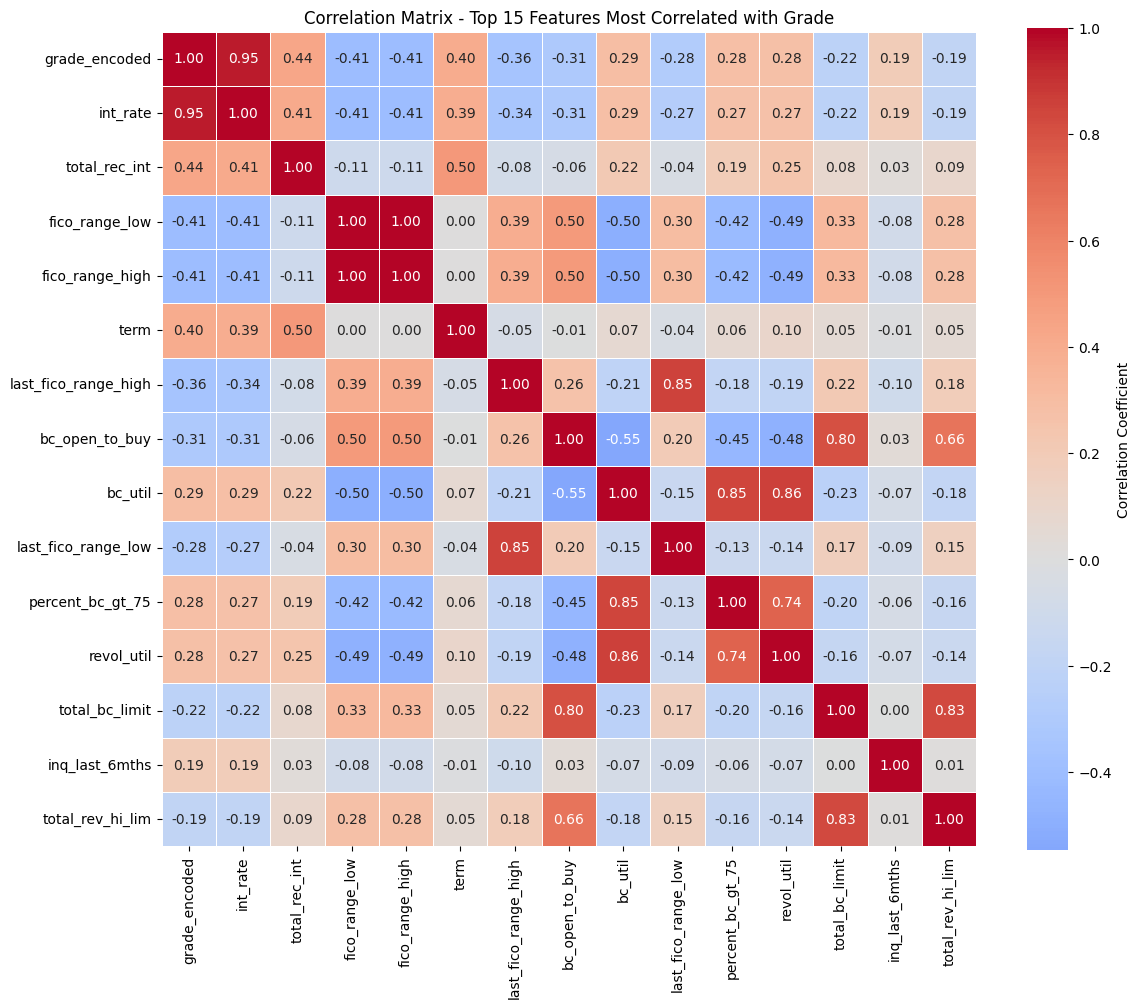

In [19]:
temp_df = training_df.copy()
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
temp_df['grade_encoded'] = temp_df['grade'].map(grade_mapping)

# Compute correlation matrix
correlation_matrix = temp_df[numerical_feature_names + ['grade_encoded']].corr()

# Select top N features most correlated with grade for visualization
top_n = 15
top_features = correlation_matrix['grade_encoded'].abs().sort_values(ascending=False).head(top_n).index.tolist()

# Plot correlation heatmap for top features
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix.loc[top_features, top_features], 
    annot=True, 
    fmt='.2f',
    cmap='coolwarm', 
    center=0, 
    square=True, 
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title(f'Correlation Matrix - Top {top_n} Features Most Correlated with Grade')
plt.tight_layout()
plt.show()

### 3.2 Feature Visualizations

In [20]:
top_10_correlated_features = correlation_matrix['grade_encoded'].abs().sort_values(ascending=False).head(10).index.tolist()

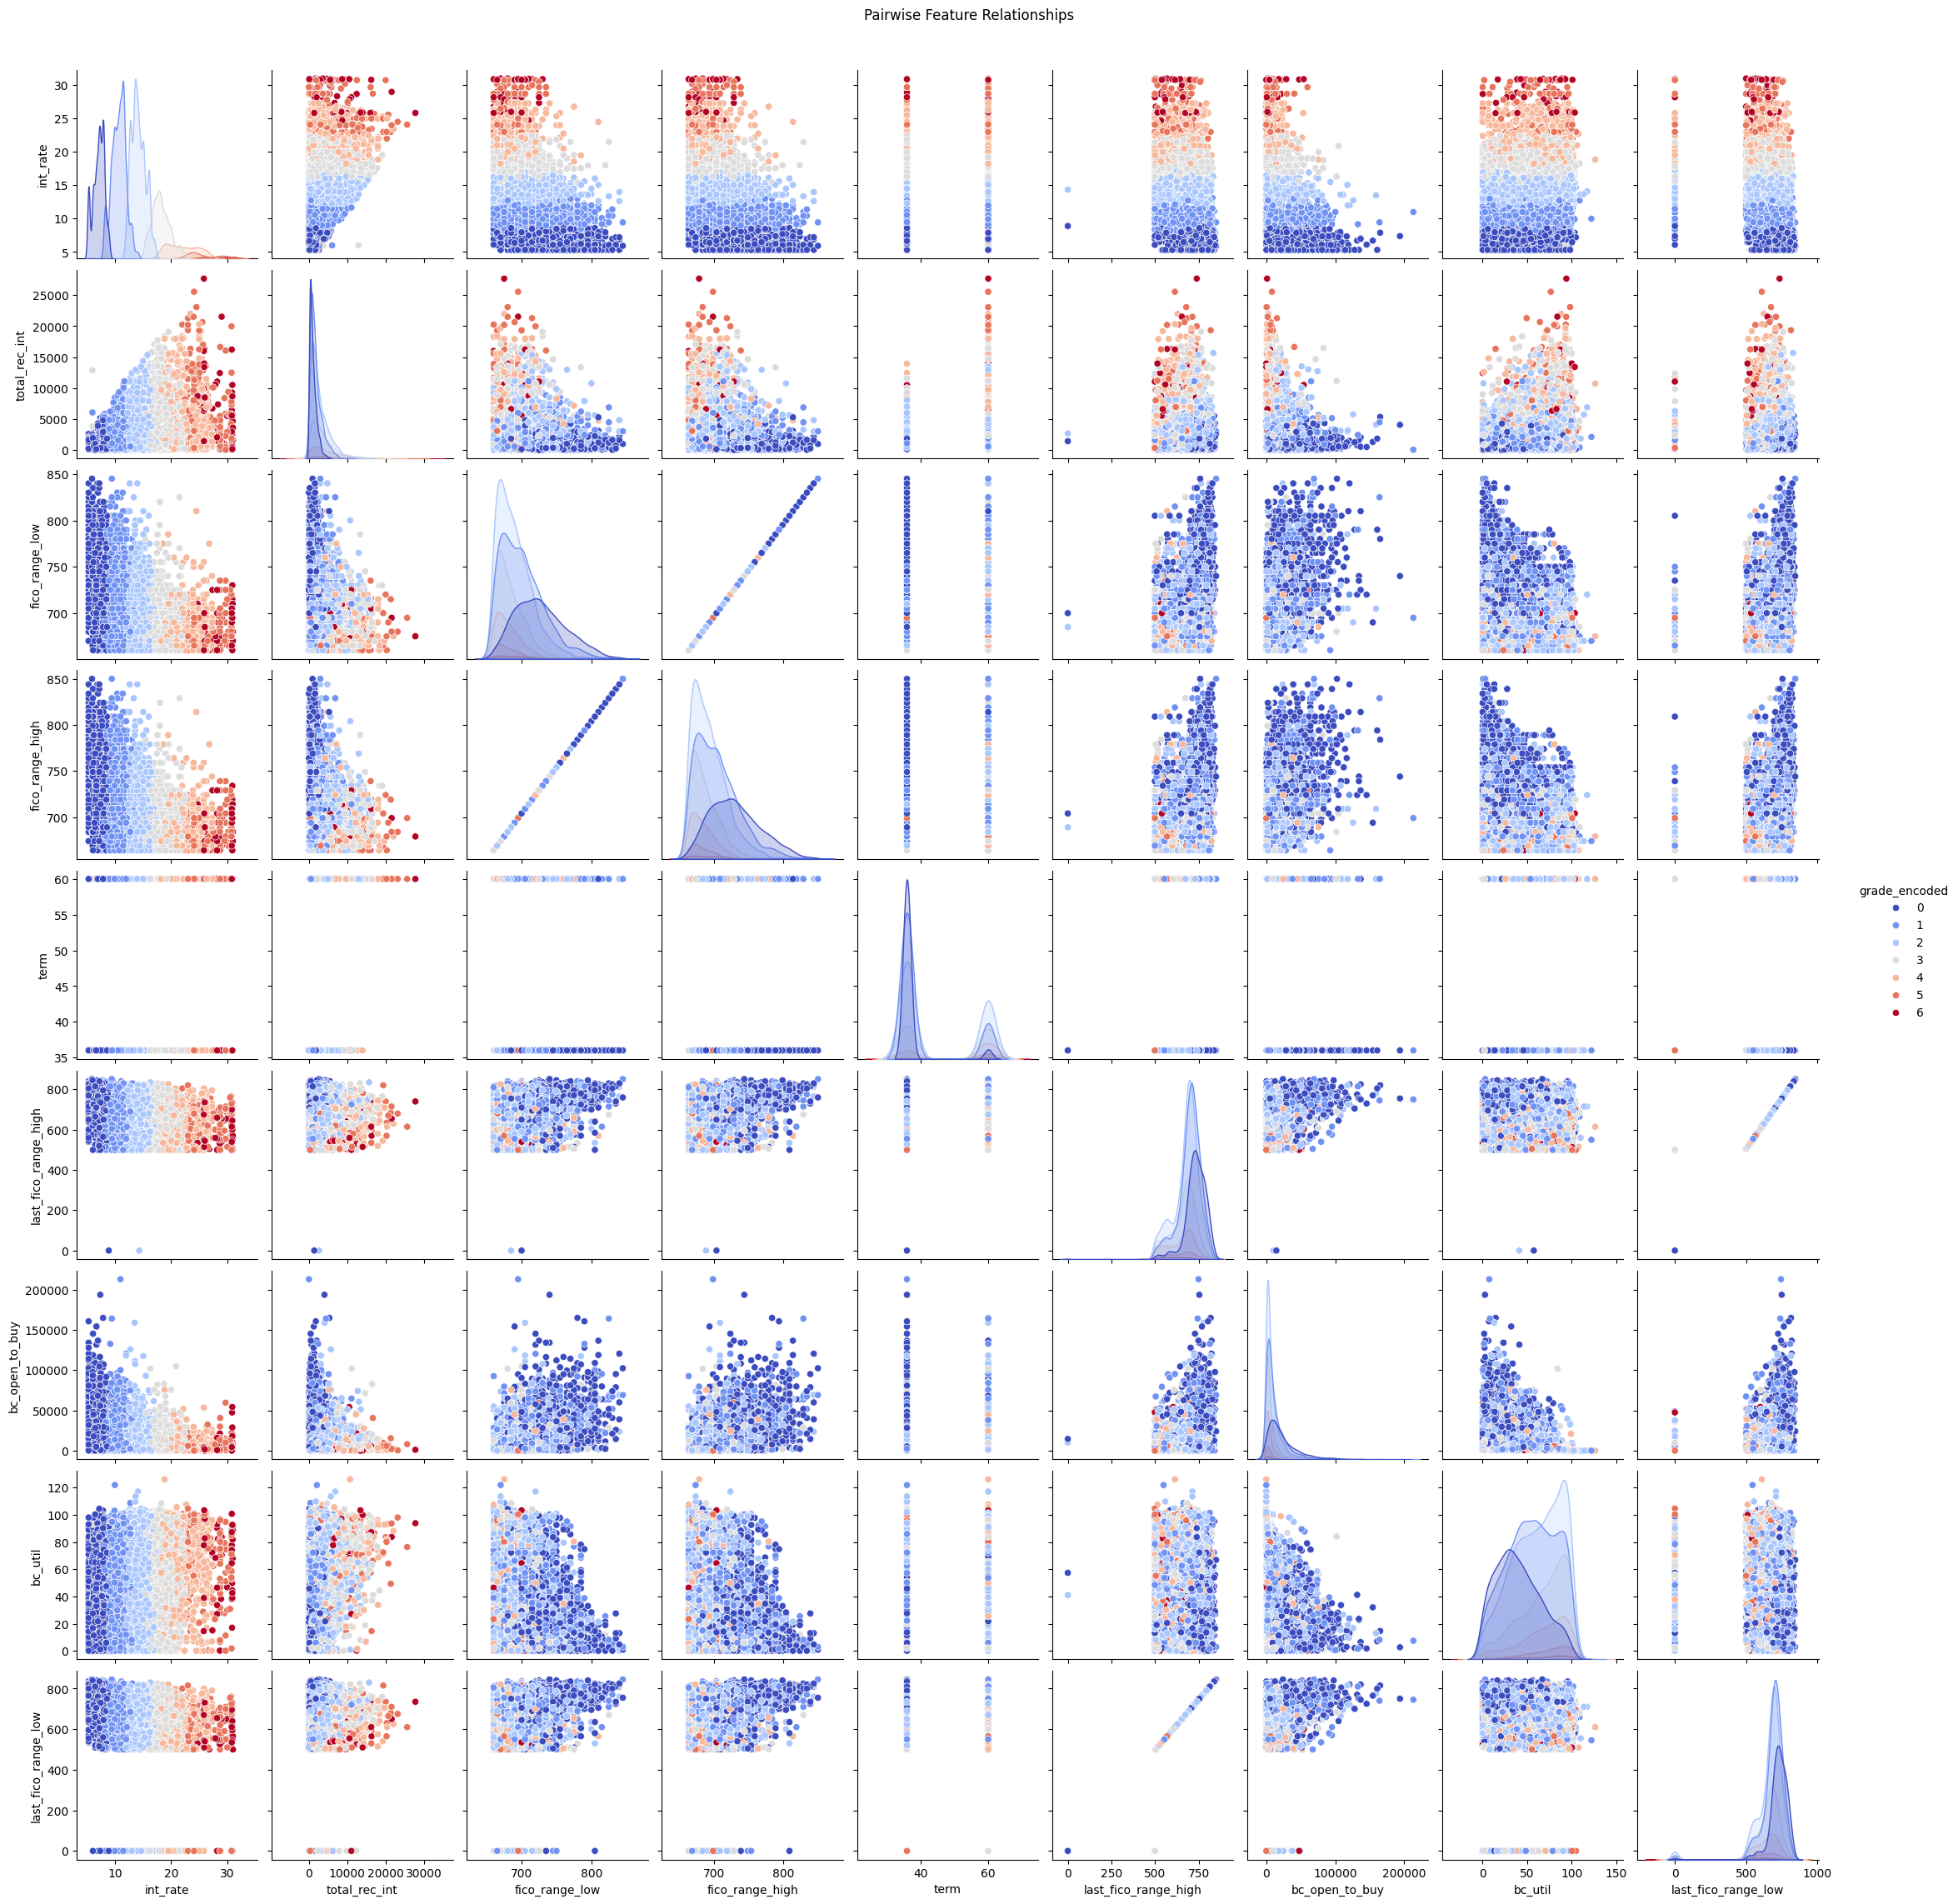

In [21]:
sns.pairplot(temp_df[top_10_correlated_features], hue='grade_encoded', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

In [51]:
def suggest_highly_corr_columns(df, target = "grade_encoded", threshold=0.95):
    """
    Returns highly correlated feature columns above the specified threshold.
    To then decide which to drop.
    """
    
    corr_matrix = df.corr(numeric_only=True).abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    #to_drop dataframe with correlation values
    to_drop = []
    for column in upper_triangle.columns:
        high_corr = upper_triangle.index[upper_triangle[column] > threshold].tolist()
        for row in high_corr:
            to_drop.append((row, column, upper_triangle.at[row, column]))
    
    #suggest to drop the one with lower correlation with target variable
    #map grade to numerical for correlation calculation
    if df[target].dtype == 'object':
        df[target] = df[target].astype('category').cat.codes
    final_to_drop = set()
    for col1, col2, corr_value in to_drop:
        corr_with_target_col1 = abs(df[col1].corr(df[target]))
        corr_with_target_col2 = abs(df[col2].corr(df[target]))
        if corr_with_target_col1 < corr_with_target_col2:
            final_to_drop.add(col1)
        else:
            final_to_drop.add(col2)
    #print the columns that correlate with their correlation value and return the columns to drop
    print("Highly correlated columns (above threshold):")
    for col1, col2, corr_value in to_drop:
        print(f"{col1} | {col2} | {corr_value:.2f}")
    return final_to_drop

suggest_highly_corr_columns(temp_df, target="grade_encoded", threshold=0.95)

Highly correlated columns (above threshold):
loan_amnt | funded_amnt | 1.00
loan_amnt | funded_amnt_inv | 1.00
funded_amnt | funded_amnt_inv | 1.00
fico_range_low | fico_range_high | 1.00
out_prncp | out_prncp_inv | 1.00
total_pymnt | total_pymnt_inv | 1.00
total_pymnt | total_rec_prncp | 0.97
total_pymnt_inv | total_rec_prncp | 0.97
recoveries | collection_recovery_fee | 0.98
num_actv_rev_tl | num_rev_tl_bal_gt_0 | 1.00
open_acc | num_sats | 1.00
tot_cur_bal | tot_hi_cred_lim | 0.98
int_rate | grade_encoded | 0.95


{'collection_recovery_fee',
 'fico_range_high',
 'funded_amnt',
 'int_rate',
 'loan_amnt',
 'num_actv_rev_tl',
 'open_acc',
 'out_prncp_inv',
 'tot_cur_bal',
 'total_pymnt',
 'total_rec_prncp'}

In [52]:
#remove highly correlated columns
# training_df.drop(columns=highly_corr_cols, inplace=True)
# test_df.drop(columns=highly_corr_cols, inplace=True)

### 3.2 Outlier Detection and Visualization

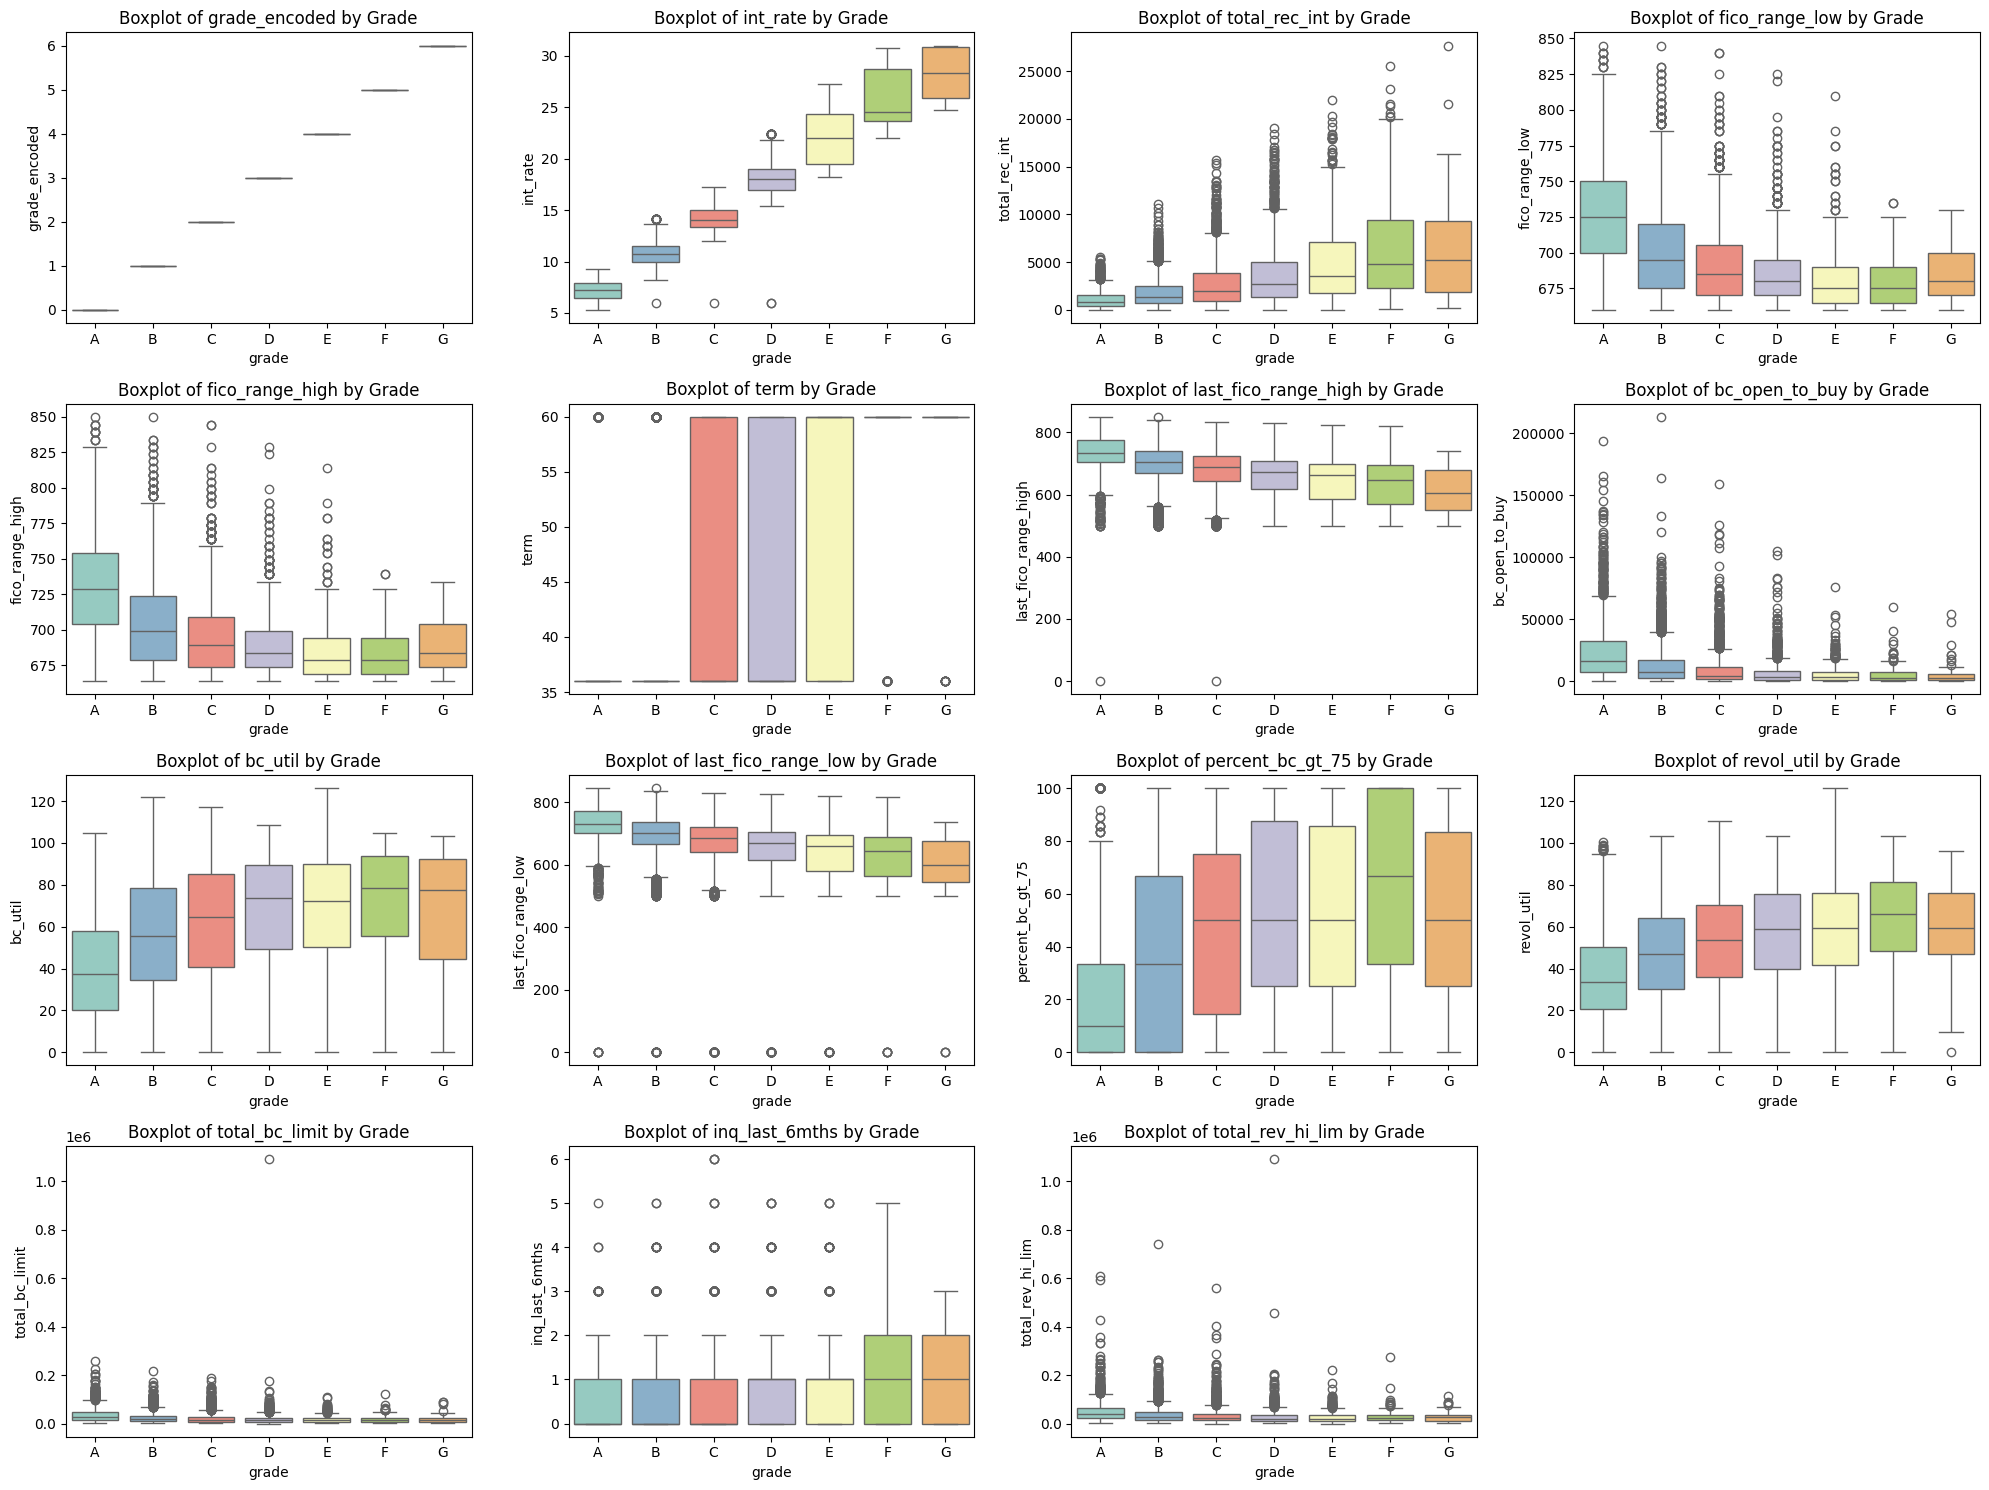

In [53]:
# Visualize outliers in top features using boxplots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(top_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x='grade', y=feature, data=temp_df, hue='grade', 
                palette='Set3', legend=False, 
                order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    plt.title(f'Boxplot of {feature} by Grade')
    plt.tight_layout()
plt.show()

Won't remove outliers. They can have important effects. On the target variables and Tree based methods, especially forests can treat them well.

## 4 Preprocessing

### 4.1 Prepare & Split Dataset

- Separate target attribute from features 
- Remove `ID`

In [22]:
from sklearn.model_selection import train_test_split
# Prepare data
X = training_df.drop(['ID', 'grade'], axis=1)
y = training_df['grade']

# Split data (stratified to preserve class distribution)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 4.2 Preprocessing Pipeline

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Rebuild feature lists limited to columns in X_train
num_features = [f for f in numerical_feature_names if f in X_train.columns]
cat_features = [f for f in categorical_feature_names if f in X_train.columns]
bin_features = [f for f in binary_feature_names if f in X_train.columns]

def make_preprocessor(scale: bool):
    num_transformer = StandardScaler() if scale else 'passthrough'
    return ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
            ('bin', 'passthrough', bin_features)
        ],
        remainder='drop'
    )

## 5 Model Selection and Hyperparameter Experimentation

### 5.1 Find best Hyperparameters with Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

from classifierConfigs import get_classifier_configs, get_scorings

# Silence noisy worker warnings
import os, warnings
warnings.filterwarnings("ignore", message=".*pkg_resources is deprecated as an API.*", category=UserWarning)
os.environ.setdefault("PYTHONWARNINGS", "ignore:pkg_resources is deprecated as an API:UserWarning")
import importlib
import classifierConfigs as cc
importlib.reload(cc)
from classifierConfigs import get_classifier_configs, get_scorings, model_requires_int_labels

# Task selection: 'multiclass' or 'binary'
task = 'multiclass'

# Label encoding for multiclass XGBoost only
grade_to_int = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
int_to_grade = {v:k for k,v in grade_to_int.items()}
y_train_int = y_train.map(grade_to_int)
y_val_int = y_val.map(grade_to_int)

# Multi-metric scoring and configs by task
scoring = get_scorings(multiclass=(task == 'multiclass'))
refit_metric = "f1_macro"
configs = get_classifier_configs(task=task)

results_dir = "loan/gridsearch"
os.makedirs(results_dir, exist_ok=True)
all_results = []

for name, cfg in configs.items():
    print(f"Running Grid Search for {name}...")
    scale_TF = name.lower().startswith('knn')  # Scale only for KNN
    pipe = Pipeline(steps=[
        ('preprocessor', make_preprocessor(scale=scale_TF)),
        ('classifier', cfg['model'])
    ])

    param_grid = {f'classifier__{k}': v for k, v in cfg['param_grid'].items()}

    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring=scoring,
        refit=refit_metric,
        n_jobs=6,
        verbose=3,
        cv=3
    )

    # Fit: only XGBoost needs integer labels (for multiclass)
    y_fit = y_train_int if (task == 'multiclass' and model_requires_int_labels(name)) else y_train
    gs.fit(X_train, y_fit)

    # Save per-model CV results
    res_df = pd.DataFrame(gs.cv_results_)
    rank_col = f'rank_test_{refit_metric}' if f'rank_test_{refit_metric}' in res_df.columns else ('rank_test_score' if 'rank_test_score' in res_df.columns else None)
    if rank_col is not None:
        res_df = res_df.sort_values(rank_col)
    res_df.insert(0, 'model', name)
    res_df.insert(1, 'scoring', refit_metric)
    res_df['preproc_scaled'] = scale_TF
    out_path = os.path.join(results_dir, f"{name.replace(' ', '_')}_cv_results_{refit_metric}.csv")
    res_df.to_csv(out_path, index=False)
    all_results.append(res_df)

    print(f"Best parameters for {name}: {gs.best_params_} | Best {refit_metric}: {gs.best_score_:.4f}")

    # Predict and decode if needed
    y_val_pred = gs.predict(X_val)
    if task == 'multiclass' and model_requires_int_labels(name):
        y_val_pred = pd.Series(y_val_pred).map(int_to_grade).values

    print(f"Validation Classification Report for {name}:\n")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    print("-" * 80)

if all_results:
    pd.concat(all_results, ignore_index=True).to_csv(
        os.path.join(results_dir, f"Loan_ALL_cv_results_{refit_metric}.csv"),
        index=False
    )

Running Grid Search for KNN...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END classifier__n_neighbors=2, classifier__p=1, classifier__weights=uniform; accuracy: (test=0.418) f1_macro: (test=0.250) precision_macro: (test=0.272) recall_macro: (test=0.263) total time=   0.9s
[CV 1/3] END classifier__n_neighbors=2, classifier__p=1, classifier__weights=distance; accuracy: (test=0.417) f1_macro: (test=0.294) precision_macro: (test=0.302) recall_macro: (test=0.290) total time=   0.9s
[CV 3/3] END classifier__n_neighbors=2, classifier__p=1, classifier__weights=distance; accuracy: (test=0.412) f1_macro: (test=0.292) precision_macro: (test=0.313) recall_macro: (test=0.286) total time=   1.0s
[CV 1/3] END classifier__n_neighbors=2, classifier__p=2, classifier__weights=uniform; accuracy: (test=0.397) f1_macro: (test=0.247) precision_macro: (test=0.306) recall_macro: (test=0.257) total time=   0.1s
[CV 2/3] END classifier__n_neighbors=2, classifier__p=1, classifier__weigh

### 5.2 Visualize effects of altering Hyperparameters

In [65]:
# if not all_results:
#     #load all results
results_dir = "loan/gridsearch"
file = "Loan_ALL_cv_results_f1_macro.csv"
all_results = pd.read_csv(os.path.join(results_dir, file))
all_results["params"].iloc[0]

"{'classifier__n_neighbors': 6, 'classifier__p': 1, 'classifier__weights': 'distance'}"

In [51]:
all_results.shape
randomForest_results = all_results[all_results['model'] == 'Random Forest']
XGBoost_results = all_results[all_results['model'] == 'XGBoost']
KNN_results = all_results[all_results['model'] == 'KNN']


In [52]:
randomForest_params = ["param_classifier__n_estimators", "param_classifier__max_depth"]
XGBoost_params = ["param_classifier__n_estimators", "param_classifier__max_depth", "param_classifier__learning_rate"]
KNN_params = ["param_classifier__n_neighbors", "param_classifier__weights", "param_classifier__p"]

In [92]:
randomForest_best = randomForest_results.loc[randomForest_results['rank_test_f1_macro'] == 1].iloc[0]
randomForest_best_params = {
    'n_estimators': randomForest_best['param_classifier__n_estimators'].astype(int),
    'max_depth': randomForest_best['param_classifier__max_depth'].astype(int)
}
XGBoost_best = XGBoost_results.loc[XGBoost_results['rank_test_f1_macro'] == 1].iloc[0]
XGBoost_best_params = {
    'n_estimators': XGBoost_best['param_classifier__n_estimators'].astype(int),
    'max_depth': XGBoost_best['param_classifier__max_depth'].astype(int),
    'learning_rate': XGBoost_best['param_classifier__learning_rate']
}
KNN_best = KNN_results.loc[KNN_results['rank_test_f1_macro'] == 1].iloc[0]
KNN_best_params = {
    'n_neighbors': KNN_best['param_classifier__n_neighbors'].astype(int),
    'weights': KNN_best['param_classifier__weights'],
    'p': KNN_best['param_classifier__p'].astype(int)
}
#plot different hyperparameter effects for all models
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hyperparameter_effects(results_df, model_name, hyperparams, best_params):
    n = len(hyperparams)
    fig, axs = plt.subplots(1, n, figsize=(6 * n, 5), squeeze=False)
    axs = axs[0]

    for i, param in enumerate(hyperparams):
        ax = axs[i]
        subset = results_df.copy()
        for other_param in hyperparams:
            if other_param != param:
                subset = subset[
                    subset[other_param] == best_params[other_param.replace('param_classifier__', '')]
                ]

        sub = subset.dropna(subset=[param, 'mean_test_f1_macro'])

        # Try to treat numeric params as numeric even if dtype=object
        is_numeric = pd.api.types.is_numeric_dtype(sub[param])
        if not is_numeric:
            coerced = pd.to_numeric(sub[param], errors='coerce')
            if coerced.notna().sum() == len(sub):
                sub[param] = coerced
                is_numeric = True

        if is_numeric:
            sub = sub.sort_values(by=param)
            sns.lineplot(data=sub, x=param, y='mean_test_f1_macro', marker='o', ax=ax)
        else:
            sns.barplot(data=sub, x=param, y='mean_test_f1_macro', ax=ax)
            ax.tick_params(axis='x', rotation=45)

        clean_name = param.replace('param_classifier__', '')
        ax.set_title(clean_name)
        ax.set_xlabel(clean_name)
        if i == 0:
            ax.set_ylabel('Mean F1 Macro')
        else:
            ax.set_ylabel('')
        ax.grid(True, linestyle='--', alpha=0.4)

    fig.suptitle(f'Hyperparameter effects for {model_name}', y=1.03)
    fig.tight_layout()
# ...existing code...

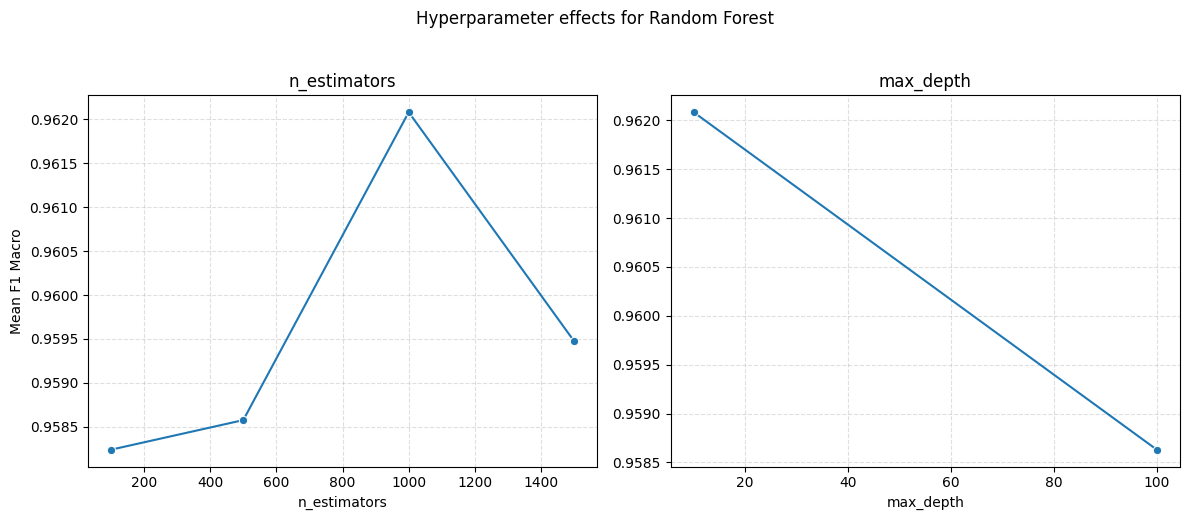

In [93]:
plot_hyperparameter_effects(randomForest_results, 'Random Forest', randomForest_params, randomForest_best_params)

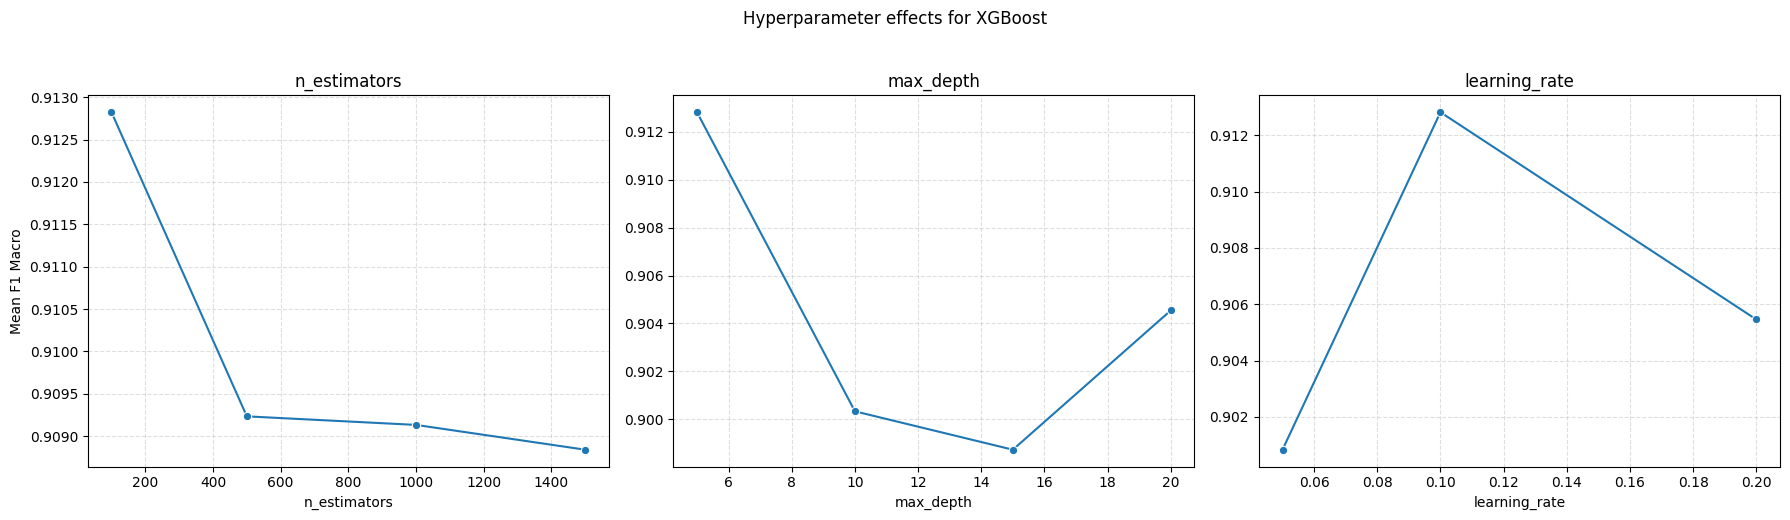

In [94]:
plot_hyperparameter_effects(XGBoost_results, 'XGBoost', XGBoost_params, XGBoost_best_params)

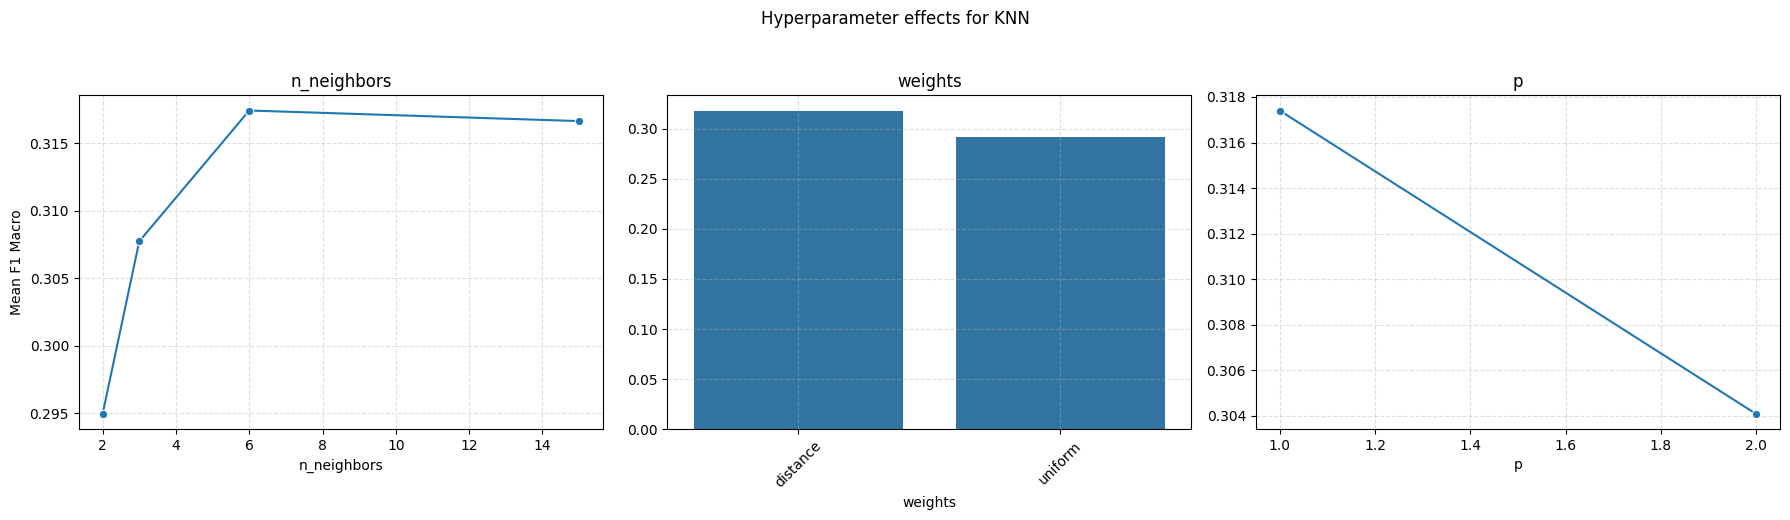

In [95]:
plot_hyperparameter_effects(KNN_results, 'KNN', KNN_params, KNN_best_params)

### 5.3 Best performing Model

In [96]:
#print the best performing model and its parameters
print("Best Performing Models:")
print(f"Random Forest: F1 Macro = {randomForest_best['mean_test_f1_macro']:.4f}, Params = {randomForest_best_params}")
print(f"XGBoost: F1 Macro = {XGBoost_best['mean_test_f1_macro']:.4f}, Params = {XGBoost_best_params}")
print(f"KNN: F1 Macro = {KNN_best['mean_test_f1_macro']:.4f}, Params = {KNN_best_params}")

Best Performing Models:
Random Forest: F1 Macro = 0.9621, Params = {'n_estimators': np.int64(1000), 'max_depth': np.int64(10)}
XGBoost: F1 Macro = 0.9128, Params = {'n_estimators': np.int64(100), 'max_depth': np.int64(5), 'learning_rate': np.float64(0.1)}
KNN: F1 Macro = 0.3174, Params = {'n_neighbors': np.int64(6), 'weights': 'distance', 'p': np.int64(1)}


In [100]:
#Train best model on full training data and evaluate on test set
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
# Train all best performing model on full training data and evaluate on test set
best_models = {
    'Random Forest': 
        (RandomForestClassifier(
            max_features=None,
            bootstrap=True,
            criterion='entropy',
            oob_score=True,
            n_jobs=-1,
            random_state=42,
            **randomForest_best_params), randomForest_best_params),
    'XGBoost': 
        (XGBClassifier(
            objective='multi:softprob',
            eval_metric='mlogloss',
            n_jobs=-1,
            random_state=42,
            **XGBoost_best_params), XGBoost_best_params),
    'KNN': (KNeighborsClassifier(**KNN_best_params), KNN_best_params)
}
for model_name, (model, params) in best_models.items():
    print(f"Training and evaluating best {model_name} model...")
    scale_TF = model_name.lower().startswith('knn')  # Scale only for KNN
    pipe = Pipeline(steps=[
        ('preprocessor', make_preprocessor(scale=scale_TF)),
        ('classifier', model)
    ])
    # Fit: only XGBoost needs integer labels (for multiclass)
    y_fit = y_train_int if (task == 'multiclass' and model_requires_int_labels(model_name)) else y_train
    pipe.fit(X_train, y_fit)

    # Predict and decode if needed
    y_val_pred = pipe.predict(X_val)
    if task == 'multiclass' and model_requires_int_labels(model_name):
        y_val_pred = pd.Series(y_val_pred).map(int_to_grade).values

    print(f"Test Classification Report for {model_name}:\n")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    print("-" * 80)

Training and evaluating best Random Forest model...
Test Classification Report for Random Forest:

              precision    recall  f1-score   support

           A       1.00      0.99      1.00       364
           B       0.99      1.00      1.00       576
           C       1.00      0.99      1.00       598
           D       0.99      0.99      0.99       290
           E       0.98      0.95      0.96       124
           F       0.90      0.95      0.92        37
           G       0.91      0.91      0.91        11

    accuracy                           0.99      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.99      0.99      0.99      2000

--------------------------------------------------------------------------------
Training and evaluating best XGBoost model...
Test Classification Report for XGBoost:

              precision    recall  f1-score   support

           A       1.00      0.99      1.00       364
           B       0.99    

### 5.3 Test effect of Scaling with KNN using top Hyperparameters

In [105]:
knn_wo_scaling = Pipeline(steps=[
    ('preprocessor', make_preprocessor(scale=False)),
    ('classifier', KNeighborsClassifier(**KNN_best_params))
])
y_fit = y_train_int
knn_wo_scaling.fit(X_train, y_fit)

# Predict and decode if needed
y_val_pred = knn_wo_scaling.predict(X_val)
if task == 'multiclass' and model_requires_int_labels("KNN"):
    y_val_pred = pd.Series(y_val_pred).map(int_to_grade).values

print(f"Test Classification Report for KNN:\n")
print(classification_report(y_val, y_val_pred, zero_division=0))
print("-" * 80)

Test Classification Report for KNN:

              precision    recall  f1-score   support

           A       0.36      0.35      0.36       364
           B       0.31      0.38      0.34       576
           C       0.34      0.38      0.36       598
           D       0.27      0.19      0.22       290
           E       0.15      0.06      0.08       124
           F       0.12      0.03      0.04        37
           G       0.00      0.00      0.00        11

    accuracy                           0.32      2000
   macro avg       0.22      0.20      0.20      2000
weighted avg       0.30      0.32      0.31      2000

--------------------------------------------------------------------------------
